# Storytelling 2 - inträde på arbetsmarknaden

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import duckdb as db

df = pd.read_csv("data/intrade_pa_arbetsmarknaden_2012-2024.csv")
df

,Utbildningsområde,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Totalt,10460,9146,9727.0,9870,11708,11618,11899,12331,12492,14957,17677,20789,18476
1,Data/It,689,564,735.0,856,1060,1199,1332,1243,1086,1246,1991,2818,2372
2,"Ekonomi, administration och försäljning",2931,2870,2927.0,3007,3496,3172,2945,3526,3666,4194,4936,5190,4273
3,Friskvård och kroppsvård,231,104,86.0,104,134,111,94,61,80,94,105,118,123
4,"Hotell, restaurang och turism",742,647,600.0,543,592,511,481,598,494,548,736,723,638
5,Hälso- och sjukvård samt socialt arbete,1298,1115,1270.0,1413,1840,1861,1990,1830,2041,2741,2765,3376,3510
6,Journalistik och information,57,33,50.0,82,135,154,160,203,164,221,244,205,203
7,Juridik,24,49,49.0,70,84,53,94,94,98,94,140,131,91
8,"Kultur, media och design",557,446,488.0,354,558,611,471,523,679,660,828,891,785
9,"Lantbruk, djurvård, trädgård, skog och fiske",391,371,336.0,328,322,352,368,413,291,387,423,491,504


In [158]:
df.head().set_index('Utbildningsområde')

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Utbildningsområde,,,,,,,,,,,,,
Totalt,10460,9146,9727.0,9870,11708,11618,11899,12331,12492,14957,17677,20789,18476
Data/It,689,564,735.0,856,1060,1199,1332,1243,1086,1246,1991,2818,2372
"Ekonomi, administration och försäljning",2931,2870,2927.0,3007,3496,3172,2945,3526,3666,4194,4936,5190,4273
Friskvård och kroppsvård,231,104,86.0,104,134,111,94,61,80,94,105,118,123
"Hotell, restaurang och turism",742,647,600.0,543,592,511,481,598,494,548,736,723,638


In [159]:
df.iloc[:16]

,Utbildningsområde,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Totalt,10460,9146,9727.0,9870,11708,11618,11899,12331,12492,14957,17677,20789,18476
1,Data/It,689,564,735.0,856,1060,1199,1332,1243,1086,1246,1991,2818,2372
2,"Ekonomi, administration och försäljning",2931,2870,2927.0,3007,3496,3172,2945,3526,3666,4194,4936,5190,4273
3,Friskvård och kroppsvård,231,104,86.0,104,134,111,94,61,80,94,105,118,123
4,"Hotell, restaurang och turism",742,647,600.0,543,592,511,481,598,494,548,736,723,638
5,Hälso- och sjukvård samt socialt arbete,1298,1115,1270.0,1413,1840,1861,1990,1830,2041,2741,2765,3376,3510
6,Journalistik och information,57,33,50.0,82,135,154,160,203,164,221,244,205,203
7,Juridik,24,49,49.0,70,84,53,94,94,98,94,140,131,91
8,"Kultur, media och design",557,446,488.0,354,558,611,471,523,679,660,828,891,785
9,"Lantbruk, djurvård, trädgård, skog och fiske",391,371,336.0,328,322,352,368,413,291,387,423,491,504


In [160]:
df.value_counts()

Utbildningsområde                             2012   2013  2014    2015  2016   2017   2018   2019   2020   2021   2022   2023   2024 
Data/It                                       689    564   735.0   856   1060   1199   1332   1243   1086   1246   1991   2818   2372     1
Ekonomi, administration och försäljning       2931   2870  2927.0  3007  3496   3172   2945   3526   3666   4194   4936   5190   4273     1
Friskvård och kroppsvård                      231    104   86.0    104   134    111    94     61     80     94     105    118    123      1
Hotell, restaurang och turism                 742    647   600.0   543   592    511    481    598    494    548    736    723    638      1
Hälso- och sjukvård samt socialt arbete       1298   1115  1270.0  1413  1840   1861   1990   1830   2041   2741   2765   3376   3510     1
Journalistik och information                  57     33    50.0    82    135    154    160    203    164    221    244    205    203      1
Juridik                  

In [161]:
df.columns

Index(['Utbildningsområde', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [162]:
df.dtypes

Utbildningsområde     object
2012                   int64
2013                   int64
2014                 float64
2015                   int64
2016                   int64
2017                   int64
2018                   int64
2019                   int64
2020                   int64
2021                   int64
2022                   int64
2023                   int64
2024                   int64
dtype: object

In [163]:
years = [str(year) for year in range(2012, 2025)]
df[years]

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,10460,9146,9727.0,9870,11708,11618,11899,12331,12492,14957,17677,20789,18476
1,689,564,735.0,856,1060,1199,1332,1243,1086,1246,1991,2818,2372
2,2931,2870,2927.0,3007,3496,3172,2945,3526,3666,4194,4936,5190,4273
3,231,104,86.0,104,134,111,94,61,80,94,105,118,123
4,742,647,600.0,543,592,511,481,598,494,548,736,723,638
5,1298,1115,1270.0,1413,1840,1861,1990,1830,2041,2741,2765,3376,3510
6,57,33,50.0,82,135,154,160,203,164,221,244,205,203
7,24,49,49.0,70,84,53,94,94,98,94,140,131,91
8,557,446,488.0,354,558,611,471,523,679,660,828,891,785
9,391,371,336.0,328,322,352,368,413,291,387,423,491,504


In [168]:
df_total_students = df[df['Utbildningsområde'] != 'Totalt']
df_total_students

,Utbildningsområde,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Data/It,689,564,735.0,856,1060,1199,1332,1243,1086,1246,1991,2818,2372
2,"Ekonomi, administration och försäljning",2931,2870,2927.0,3007,3496,3172,2945,3526,3666,4194,4936,5190,4273
3,Friskvård och kroppsvård,231,104,86.0,104,134,111,94,61,80,94,105,118,123
4,"Hotell, restaurang och turism",742,647,600.0,543,592,511,481,598,494,548,736,723,638
5,Hälso- och sjukvård samt socialt arbete,1298,1115,1270.0,1413,1840,1861,1990,1830,2041,2741,2765,3376,3510
6,Journalistik och information,57,33,50.0,82,135,154,160,203,164,221,244,205,203
7,Juridik,24,49,49.0,70,84,53,94,94,98,94,140,131,91
8,"Kultur, media och design",557,446,488.0,354,558,611,471,523,679,660,828,891,785
9,"Lantbruk, djurvård, trädgård, skog och fiske",391,371,336.0,328,322,352,368,413,291,387,423,491,504
10,Pedagogik och undervisning,303,217,148.0,192,183,154,259,164,345,354,417,550,503


In [176]:
df_total_students['Totalt'] = df_total_students[years].sum(axis='columns')

C:\Users\andre\AppData\Local\Temp\ipykernel_9884\3120952581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_students['Totalt'] = df_total_students[years].sum(axis='columns')


In [172]:
students = df_total_students.set_index("Utbildningsområde").sum(axis='columns')
df_students = students.reset_index()
df_students.columns = ['Utbildningar', 'Antal studenter']
total_students = df_students.sort_values(by='Antal studenter', ascending=False)
total_students

,Utbildningar,Antal studenter
1,"Ekonomi, administration och försäljning",47133.0
4,Hälso- och sjukvård samt socialt arbete,27050.0
12,Teknik och tillverkning,22300.0
10,Samhällsbyggnad och byggteknik,20445.0
0,Data/It,17191.0
3,"Hotell, restaurang och turism",7853.0
7,"Kultur, media och design",7851.0
13,Transporttjänster,6006.0
8,"Lantbruk, djurvård, trädgård, skog och fiske",4977.0
9,Pedagogik och undervisning,3789.0


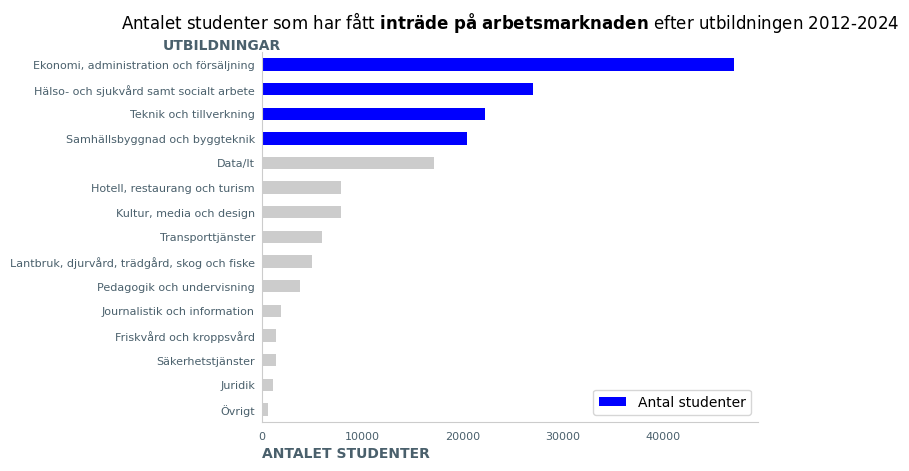

In [178]:
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1

colors = [GRAY_1] * len(total_students)
colors[:4] = ["blue"] * 4

ax = total_students.plot(kind="barh", color=colors, x='Utbildningar', y='Antal studenter')
ax.invert_yaxis()
ax.spines[["top", "right"]].set_visible(False)
ax.spines[['left', 'bottom']].set_color(GRAY_1)

ax.tick_params(axis='both', colors=GRAY_3, labelsize=8, length=0, pad=7)
ax.tick_params(axis="y", pad=5)
ax.set_title("Antalet studenter som har fått " + r"$\bf{inträde \ på \ arbetsmarknaden}$" + " efter utbildningen 2012-2024", pad=17)
ax.set_xlabel("ANTALET STUDENTER", color=GRAY_3, loc='left', fontweight="bold")
ax.set_ylabel("UTBILDNINGAR", color=GRAY_3, rotation=0, fontweight="bold")
ax.yaxis.set_label_coords(-0.08, 1)